In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
gray = np.arange(10).reshape(1, -1)
# gray = np.repeat(gray, 10, axis=0)
gray = np.vstack([gray] * 10)

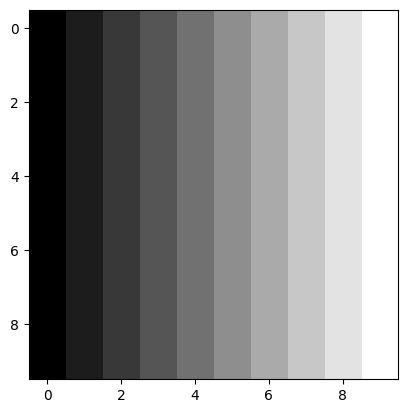

In [3]:
plt.imshow(gray, cmap='gray')
plt.show()

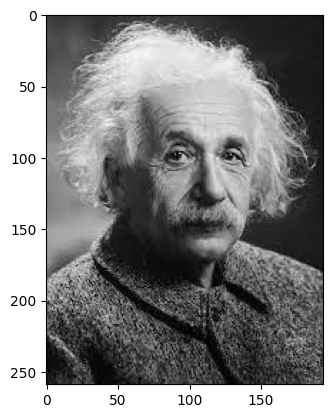

(259, 194, 3)

In [4]:
img = plt.imread('inestein.jpeg')

plt.imshow(img)
# plt.axis(False)
plt.show()
img.shape

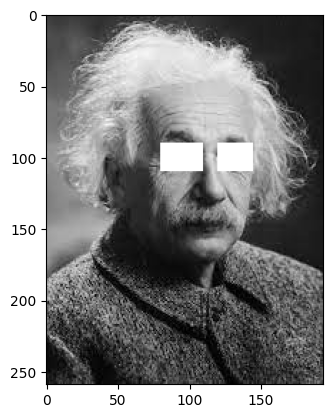

In [5]:
img2 = img.copy()
img2[90:110, 80:110] = img2[90:110, 120:145] = 255
plt.imshow(img2, cmap='gray')
plt.show()

In [6]:
plt.imsave('inestein_np_modify.jpeg', img2, format='png')

In [2]:
img = cv.imread('inestein.jpeg', cv.IMREAD_GRAYSCALE)
img[100:200, 100:300] = 255
# cv.imshow('',img)
# cv.waitKey(10000)
# cv.destroyAllWindows()
cv.imwrite('inestein_cv_modify.jpg', img)

# RGB Image

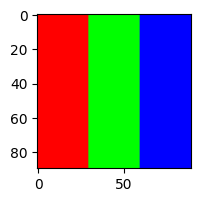

In [8]:
img = np.zeros((90, 90, 3), dtype=np.uint8)
img[:, :30, 0] = 255
img[:, 30:60, 1] = 255
img[:, 60:90, 2] = 255

plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()

# CV2 read image channel in reverse order --> BGR 

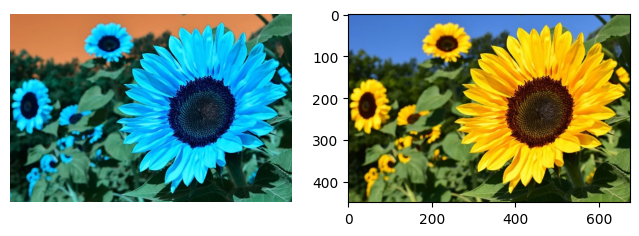

In [2]:
img = cv.imread('flower.jpg', cv.IMREAD_COLOR)

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.axis(False)
plt.imshow(img)

#we must reverse the channel order as RGB so image show as usual
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = img[:, : , ::-1]
plt.subplot(122)
plt.imshow(img)
plt.show()

# How convert RGB to HSV 
Unlike the RGB color model, which is hardware-oriented, the HSV model is user-oriented, based on the more intuitive appeal of combining hue, saturation, and value elements to create a color

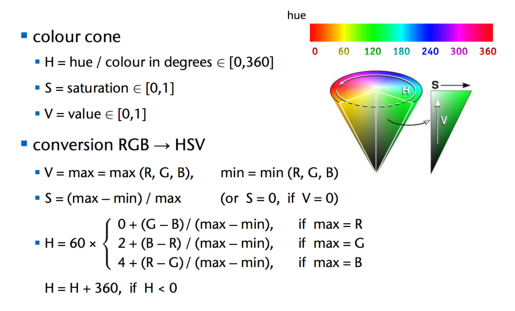

In [10]:
RgbtoHsv = plt.imread('RGBtoHSV.png')
plt.imshow(RgbtoHsv)
plt.axis(False)
plt.show()

# HSV range in open cv
### hue range is:  [0, 179]
### saturation range is: [0, 255]
### value range is :[0, 255]
Different software use different scales

In [11]:
def RGBtoHSV(R, G, B, factor=1):
    cmax = max(R, G, B)
    cmin = min(R, G, B)
    
    if cmax == cmin:
        H = 0
    elif cmax == R:
        H = ((0 + (G - B)/(cmax - cmin)) * 60) % 360
    elif cmax == G:
        H = ((2 + (B - R)/(cmax - cmin)) * 60) % 360
    elif cmax == B:
        H = ((4 + (R - G)/(cmax - cmin)) * 60) % 360
        
    if H < 0:
        H += 360
        
    V = cmax
    S = (cmax - cmin) / cmax if V !=0 else 0
    
    print('(Hue, Saturation, Value)')
    return H, S, V

In [12]:
RGBtoHSV(142, 244, 85)

(Hue, Saturation, Value)


(98.49056603773586, 0.6516393442622951, 244)

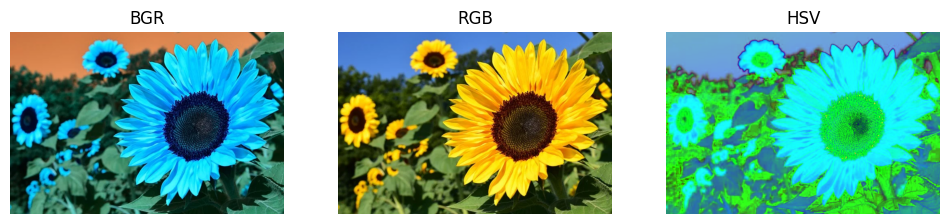

In [13]:
img = cv.imread('flower.jpg')

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.axis(False)
plt.title('BGR')
plt.imshow(img)

plt.subplot(132)
plt.axis(False)
plt.title('RGB')
plt.imshow(img[:, : , ::-1])

new = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.subplot(133)
plt.title('HSV')
plt.axis(False)
plt.imshow(new)
plt.show()

# Mask a particular color in an image
hsv channel is better for this task so we can use below picture to extract different color HUE, SATURATION, VALUE(20, 255)

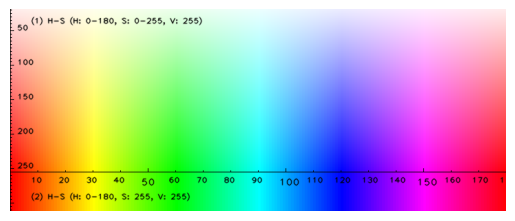

In [14]:
img = cv.imread('hsvColorRange.png', cv.IMREAD_COLOR)
plt.imshow(img[:, :, ::-1])
plt.axis(False)
plt.show()

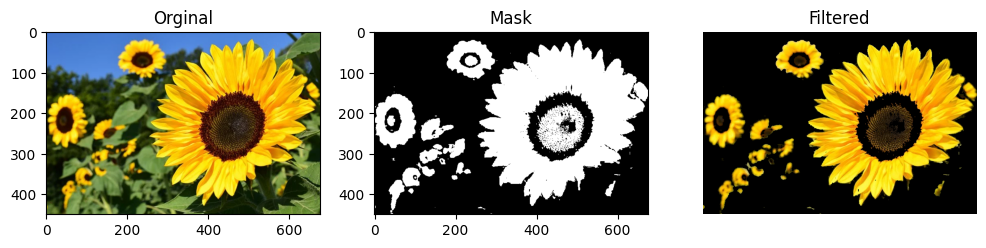

In [96]:
img = cv.imread('flower.jpg', cv.IMREAD_COLOR)
imgHsv= cv.cvtColor(img, cv.COLOR_BGR2HSV)

#first step is to find range of target color in HSV, Note: value between (20, 255)
yellowLow = np.array([13, 100, 20])
yelloUp = np.array([30, 255, 255])

#creat mask in range of target color on HSV image then apply that to BRG image
mask = cv.inRange(imgHsv, yellowLow, yelloUp)

# if we want put logo on an image we need mask invers to remove the area of orginal img
mask_inv = cv.bitwise_not(mask)
res = cv.bitwise_and(img, img, mask=mask)
# res = cv.cvtColor(res, cv.COLOR_HSV2BGR)
flower_yellow = res

plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('Orginal')
plt.imshow(img[:, :, ::-1])
plt.subplot(132)
plt.title('Mask')
plt.imshow(mask, cmap='gray')
plt.subplot(133)
plt.title('Filtered')
plt.imshow(res[:, :, ::-1])
plt.axis(False)
plt.show()

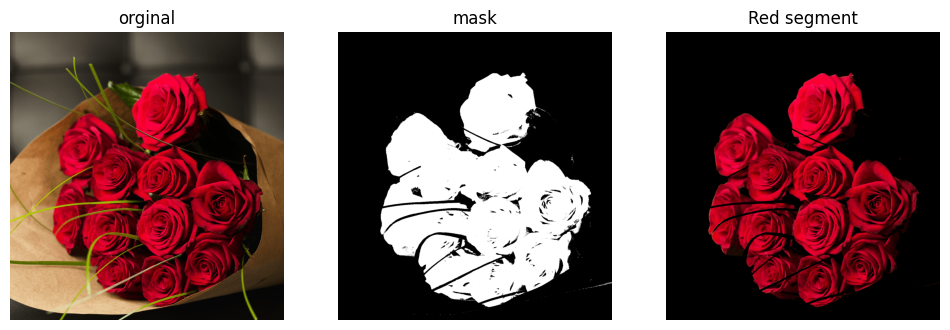

In [6]:
img = cv.imread('redRose.png', cv.IMREAD_COLOR)
imgHsv= cv.cvtColor(img, cv.COLOR_BGR2HSV)

redLow1 = np.array([0, 100, 20])
redUp1 = np.array([10, 255, 255])
mask1 = cv.inRange(imgHsv, redLow1, redUp1)

redLow2 = np.array([160, 10#0, 20])
redUp2 = np.array([179, 255, 255])
mask2 = cv.inRange(imgHsv, redLow2, redUp2)

# brownLow = np.array([10, 100, 20])
# brownUp = np.array([20, 255, 255])
# mask3 = cv.inRange(imgHsv, brownLow, brownUp)

mask = mask1 | mask2

res = cv.bitwise_and(img, img, mask=mask)
# res = cv.cvtColor(res, cv.COLOR_HSV2BGR)
flower_red = res

plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('orginal')
plt.imshow(img[:, :, ::-1])
plt.axis(False)
plt.subplot(132)
plt.title('mask')
plt.imshow(mask, cmap='gray')
plt.axis(False)
plt.subplot(133)
plt.title('Red segment')
plt.imshow(res[:, :, ::-1])
plt.axis(False)
plt.show()

# Change specific color 
after define mask you can change RGB image channels color with range of favorit color 
use below link to find RGB range for different color, just keep in mind cv2 imported color channels reverse: BRG

https://www.rapidtables.com/web/color/RGB_Color.html

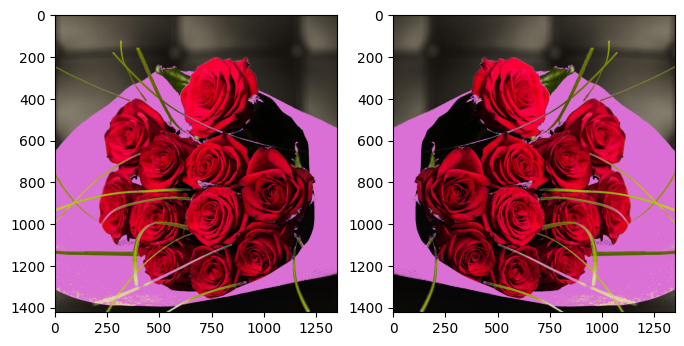

In [98]:
img = cv.imread('redRose.png', cv.IMREAD_COLOR)
imgHsv= cv.cvtColor(img, cv.COLOR_BGR2HSV)

brownLow = np.array([10, 83, 20])
brownUp = np.array([20, 255, 255])
mask = cv.inRange(imgHsv, brownLow, brownUp)

# mask = mask1 | mask2
img[mask > 0] = (214, 112, 218)
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img[:, :, ::-1])
plt.subplot(122)
plt.imshow(img[:, ::-1, ::-1])
plt.show()

# add another image or logo to image backgorund 

https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

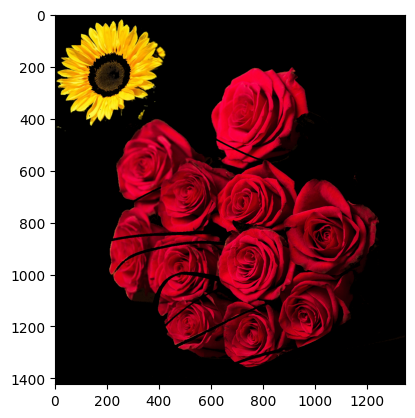

In [99]:
img1 = flower_red

img2 = flower_yellow
img2 = img2[:, 250:, :] # crop the biggest flower
img2[:120, :100 ,:] = 0

mask_inv = mask_inv[:, 250:] # add from yellow flower section
mask = cv.bitwise_not(mask_inv)

# I want to put on top-left corner, So I create a ROI
row, col, _ = img2.shape
roi = img1[0:row, 0:col]

# If we have multiple color in image and want add them to image use this approach
# Now create a mask of logo and create its inverse mask also 
# img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
# mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi, roi ,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2, img2, mask = mask)

dst = cv.add(img1_bg, img2_fg)
img1[0:row, 0:col] = dst

plt.imshow(img1[:, : , ::-1])
plt.show()

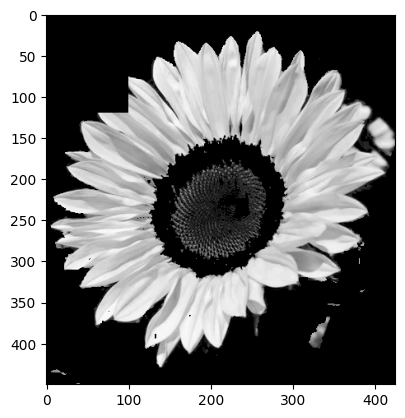

In [91]:
plt.imshow(img2gray, cmap='gray')
plt.show()

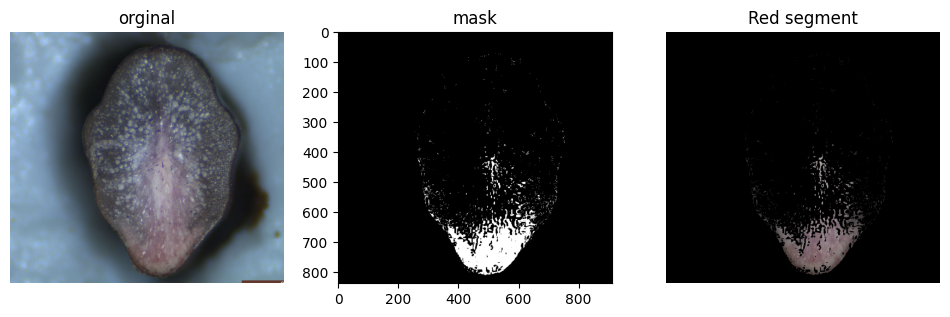

In [7]:
img = cv.imread("IMG_1516.JPG")
imgHsv= cv.cvtColor(img, cv.COLOR_BGR2HSV)

redLow1 = np.array([0, 0, 70])
redUp1 = np.array([12, 255, 255])
mask1 = cv.inRange(imgHsv, redLow1, redUp1)

redLow2 = np.array([160, 0, 70])
redUp2 = np.array([180, 255, 255])
mask2 = cv.inRange(imgHsv, redLow2, redUp2)

mask = mask1 | mask2
mask[800:, 700:] = 0
res = cv.bitwise_and(img, img, mask=mask)
# res = cv.cvtColor(res, cv.COLOR_HSV2BGR)
flower_red = res

plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('orginal')
plt.imshow(img[:, :, ::-1])
plt.axis(False)
plt.subplot(132)
plt.title('mask')
plt.imshow(mask, cmap='gray')
plt.axis(True)
plt.subplot(133)
plt.title('Red segment')
plt.imshow(res[:, :, ::-1])
plt.axis(False)
plt.show()

In [11]:
plt.imsave('arili3.jpg', res)

In [12]:
result = (np.sum(mask > 0) / np.size(mask)) * 100
print(f"Red color intensity is about {result} %")

Red color intensity is about 4.463565580381557 %


In [13]:
mask.shape

(837, 911)